Written by Nadège Guiglielmoni.

This notebook is an introduction to the python packages **pandas** to handle dataframes.

![title](panda.jpg)


# Getting pandas

pandas can be installed like any python package with pip/pip3 :


pip install pandas


pip3 install pandas


It can be installed with aptitude on Linux :


sudo apt install python-pandas


sudo apt install python3-pandas


After installing pandas, it then needs to be imported :

In [148]:
# importing pandas
import pandas

# importing other packages for fun
import numpy as np
import math
import matplotlib.pyplot as plt

# Creating a dataframe

Here is a dictionnary that we will then load in a pandas dataframe :

In [149]:
ignite_data = {
    "name" : ["Ksenia", "Mariya", "Ariel", "Kenneth", "Toby", "Mattia", "Antonio", "Nadège", "Killian", "Ben", "Ramon", "Michi"],
    "city" : ["Munich", "Sofia", "Munich", "Galway", "Porto", "Bristol", "Zagreb", "Bruxelles", "Granada", "Heidelberg", "Munich", "Munich"],
    "project" : ["ESR1", "ESR15", "ESR10", "ESR7", "ESR3", "ESR8", "ESR13", "ESR5", "ESR14", "ESR9", "ESR2", "Babysitter"],
    "original_continent" : ["???", "Europe", "Asia", "America", "Asia", "Europe", "America", "Europe", "America", "America", "America", "Europe"],
    "first_author_pub" : [3, 2, 2, 2, 3, 4, 7, 1, 3, 2, 2, 0],
    "other_author_pub" : [2, 2, 3, 1, 0, 1, 2, 10, 1, 4, 3, 4]
}

This data was obtained from the future and indicates for each IGNITE ESR their name, PhD city, project, continent where they come from, their first author publications and other authorships. Since it is a dictionnary, you can take a look at its keys :

In [150]:
ignite_data.keys()

dict_keys(['name', 'city', 'project', 'original_continent', 'first_author_pub', 'other_author_pub'])

Here is the "name" field :

In [151]:
ignite_data["name"]

['Ksenia',
 'Mariya',
 'Ariel',
 'Kenneth',
 'Toby',
 'Mattia',
 'Antonio',
 'Nadège',
 'Killian',
 'Ben',
 'Ramon',
 'Michi']

Now, this dictionnary can be loaded in a dataframe with the function DataFrame() :

In [152]:
ignite_df = pandas.DataFrame(ignite_data)
ignite_df

,city,first_author_pub,name,original_continent,other_author_pub,project
0,Munich,3,Ksenia,???,2,ESR1
1,Sofia,2,Mariya,Europe,2,ESR15
2,Munich,2,Ariel,Asia,3,ESR10
3,Galway,2,Kenneth,America,1,ESR7
4,Porto,3,Toby,Asia,0,ESR3
5,Bristol,4,Mattia,Europe,1,ESR8
6,Zagreb,7,Antonio,America,2,ESR13
7,Bruxelles,1,Nadège,Europe,10,ESR5
8,Granada,3,Killian,America,1,ESR14
9,Heidelberg,2,Ben,America,4,ESR9


You may note that an index has been added to each line. You can check the index by calling nameofdataframe.index :

In [153]:
ignite_df.index

RangeIndex(start=0, stop=12, step=1)

But here the dataframe does not quite look like what we want. The index should rather be replaced by the column names. This can be done by specifying the parameter 'index' when creating the dataframe :

In [154]:
ignite_df = pandas.DataFrame(ignite_data, index=ignite_data["name"])
ignite_df

,city,first_author_pub,name,original_continent,other_author_pub,project
Ksenia,Munich,3,Ksenia,???,2,ESR1
Mariya,Sofia,2,Mariya,Europe,2,ESR15
Ariel,Munich,2,Ariel,Asia,3,ESR10
Kenneth,Galway,2,Kenneth,America,1,ESR7
Toby,Porto,3,Toby,Asia,0,ESR3
Mattia,Bristol,4,Mattia,Europe,1,ESR8
Antonio,Zagreb,7,Antonio,America,2,ESR13
Nadège,Bruxelles,1,Nadège,Europe,10,ESR5
Killian,Granada,3,Killian,America,1,ESR14
Ben,Heidelberg,2,Ben,America,4,ESR9


This dataframe looks better, but there is now the extra column "name" and we would like to remove it. This can be done with drop() :

In [155]:
ignite_df = ignite_df.drop("name", axis=1)
ignite_df

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Mariya,Sofia,2,Europe,2,ESR15
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Toby,Porto,3,Asia,0,ESR3
Mattia,Bristol,4,Europe,1,ESR8
Antonio,Zagreb,7,America,2,ESR13
Nadège,Bruxelles,1,Europe,10,ESR5
Killian,Granada,3,America,1,ESR14
Ben,Heidelberg,2,America,4,ESR9


# Inspecting the dataframe

You can access the set of columns :

In [156]:
ignite_df.columns

Index(['city', 'first_author_pub', 'original_continent', 'other_author_pub',
       'project'],
      dtype='object')

As with Bash and R, the first lines of the dataframe can be displayed with head(), and the last lines with tail() (how convenient!) :

In [157]:
ignite_df.head()

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Mariya,Sofia,2,Europe,2,ESR15
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Toby,Porto,3,Asia,0,ESR3


In [158]:
ignite_df.tail()

,city,first_author_pub,original_continent,other_author_pub,project
Nadège,Bruxelles,1,Europe,10,ESR5
Killian,Granada,3,America,1,ESR14
Ben,Heidelberg,2,America,4,ESR9
Ramon,Munich,2,America,3,ESR2
Michi,Munich,0,Europe,4,Babysitter


# Accessing data

You can access a line using its index with .loc[] :

In [159]:
ignite_df.loc["Ksenia"] # calling line of "Ksenia"

city                  Munich
first_author_pub           3
original_continent       ???
other_author_pub           2
project                 ESR1
Name: Ksenia, dtype: object

In [160]:
ignite_df.loc["Antonio"] # calling line of "Antonio"

city                   Zagreb
first_author_pub            7
original_continent    America
other_author_pub            2
project                 ESR13
Name: Antonio, dtype: object

A line can also be retrieved with the line number using iloc[]. For example, the line of "Antonio" is the sixth line :

In [161]:
ignite_df.iloc[6] # calling line 6

city                   Zagreb
first_author_pub            7
original_continent    America
other_author_pub            2
project                 ESR13
Name: Antonio, dtype: object

The results obtained with loc["Antonio"] and iloc[6] are the same.

You can also call a full column by specifiyng the name of the column in square brackets :

In [162]:
ignite_df["city"]

Ksenia         Munich
Mariya          Sofia
Ariel          Munich
Kenneth        Galway
Toby            Porto
Mattia        Bristol
Antonio        Zagreb
Nadège      Bruxelles
Killian       Granada
Ben        Heidelberg
Ramon          Munich
Michi          Munich
Name: city, dtype: object

Calling the same column with .nameofthecolumn gives the same output :

In [199]:
ignite_df.city

Ksenia         Munich
Mariya          Sofia
Ariel          Munich
Kenneth        Galway
Toby            Porto
Mattia        Bristol
Antonio        Zagreb
Nadège      Bruxelles
Killian       Granada
Ben        Heidelberg
Ramon          Munich
Michi          Munich
Name: city, dtype: object

The column can be put into a list with tolist() :

In [163]:
ignite_df["city"].tolist()

['Munich',
 'Sofia',
 'Munich',
 'Galway',
 'Porto',
 'Bristol',
 'Zagreb',
 'Bruxelles',
 'Granada',
 'Heidelberg',
 'Munich',
 'Munich']

Several columns can be displayed simultaneously.

Here, we select the columns "city" and "project" for all the students :

In [164]:
ignite_df.loc[:, ["city", "project"]]

,city,project
Ksenia,Munich,ESR1
Mariya,Sofia,ESR15
Ariel,Munich,ESR10
Kenneth,Galway,ESR7
Toby,Porto,ESR3
Mattia,Bristol,ESR8
Antonio,Zagreb,ESR13
Nadège,Bruxelles,ESR5
Killian,Granada,ESR14
Ben,Heidelberg,ESR9


To specify that all the rows must be selected, the symbol ':' is used.

A set of students can be selected :

In [165]:
ignite_df.loc[["Ben", "Killian"],["city", "project"]]

,city,project
Ben,Heidelberg,ESR9
Killian,Granada,ESR14


And to get a specific value :

In [166]:
ignite_df.loc["Ramon","original_continent"]

'America'

Basically, to select your rows and columns, you can pass a list of rows and a list of columns. In R, it is the equivalent as selecting rows and columns with vectors.

# Manipulating the dataframe

The dataframe can be sorted on specific values.

In this first example, the values are sorted according to the column "other_author_pub" :

In [167]:
ignite_df.sort_values(by="other_author_pub")

,city,first_author_pub,original_continent,other_author_pub,project
Toby,Porto,3,Asia,0,ESR3
Kenneth,Galway,2,America,1,ESR7
Mattia,Bristol,4,Europe,1,ESR8
Killian,Granada,3,America,1,ESR14
Ksenia,Munich,3,???,2,ESR1
Mariya,Sofia,2,Europe,2,ESR15
Antonio,Zagreb,7,America,2,ESR13
Ariel,Munich,2,Asia,3,ESR10
Ramon,Munich,2,America,3,ESR2
Ben,Heidelberg,2,America,4,ESR9


By default, the values are ascending. 

In this second example, the values are sorted according to the column "first_author_pub", and the values are descending by setting the parameter 'ascending' to False :

In [168]:
ignite_df.sort_values(by="first_author_pub", ascending=False)

,city,first_author_pub,original_continent,other_author_pub,project
Antonio,Zagreb,7,America,2,ESR13
Mattia,Bristol,4,Europe,1,ESR8
Ksenia,Munich,3,???,2,ESR1
Toby,Porto,3,Asia,0,ESR3
Killian,Granada,3,America,1,ESR14
Mariya,Sofia,2,Europe,2,ESR15
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Ben,Heidelberg,2,America,4,ESR9
Ramon,Munich,2,America,3,ESR2


# Analyzing your data

The function describe() is similar to summary() in R : for columns that contain numerical values, it computes the number of values, mean, standard deviation, minimum, maximum and quartiles.

In [169]:
ignite_df.describe()

,first_author_pub,other_author_pub
count,12.000000,12.000000
mean,2.583333,2.750000
std,1.729862,2.598076
min,0.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.250000
max,7.000000,10.000000


You can also compute these informations on each column.

Computing maximum on first_author_pub and other_author_pub :

In [170]:
ignite_df["first_author_pub"].max()

7

In [171]:
ignite_df["other_author_pub"].max()

10

Computing minimum on first_author_pub and other_author_pub :

In [172]:
ignite_df["first_author_pub"].min()

0

In [173]:
ignite_df["other_author_pub"].min()

0

The elements in the output of describe() can be 

# Exercise 1

What is the number of first_author_pub by Michi in ignite_df ? And the number of other_author_pub by Michi in ignite_df ?

What is the total number of first_author_pub from everybody? And other_author_pub?

Now, since Michi is the babysitter of all the ESR, we would like his first_author_pub count to be equal to the total number of first_author_pub. Change this value.

In [174]:
# this is not the answer!
ignite_data["first_author_pub"][11] = 31
ignite_name = ignite_data["name"]
del ignite_data["name"]
ignite_df = pandas.DataFrame(ignite_data, index=ignite_name)

# but this is what you are supposed to get
ignite_df

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Mariya,Sofia,2,Europe,2,ESR15
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Toby,Porto,3,Asia,0,ESR3
Mattia,Bristol,4,Europe,1,ESR8
Antonio,Zagreb,7,America,2,ESR13
Nadège,Bruxelles,1,Europe,10,ESR5
Killian,Granada,3,America,1,ESR14
Ben,Heidelberg,2,America,4,ESR9


# Selecting elements with booleans

The data can be subsetted with a boolean.

For example, we can select all the lines of people who live in Munich. The condition will be whether the column 'city' is equal to "Munich" :

In [200]:
ignite_df[ ignite_df.city == "Munich"]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Ariel,Munich,2,Asia,3,ESR10
Ramon,Munich,2,America,3,ESR2
Michi,Munich,31,Europe,4,Babysitter


Here, to select people who have more than 2 first author publications :

In [205]:
ignite_df[ ignite_df.first_author_pub > 2 ]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Toby,Porto,3,Asia,0,ESR3
Mattia,Bristol,4,Europe,1,ESR8
Antonio,Zagreb,7,America,2,ESR13
Killian,Granada,3,America,1,ESR14
Michi,Munich,31,Europe,4,Babysitter


Note that the output is exactly the same if you use .loc[] :

In [206]:
ignite_df.loc[ ignite_df.first_author_pub > 2 ]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Toby,Porto,3,Asia,0,ESR3
Mattia,Bristol,4,Europe,1,ESR8
Antonio,Zagreb,7,America,2,ESR13
Killian,Granada,3,America,1,ESR14
Michi,Munich,31,Europe,4,Babysitter


To indicate the columns to display, .loc[] must be used. In this example, the "first_author_pub" and "other_author_pub" columns are displayed for all the lines where first_author_pub is strictly superior to 2 :

In [208]:
ignite_df.loc[ ignite_df.first_author_pub > 2, ["first_author_pub", "other_author_pub"] ]

,first_author_pub,other_author_pub
Ksenia,3,2
Toby,3,0
Mattia,4,1
Antonio,7,2
Killian,3,1
Michi,31,4


Several conditions can be specified using & (and), | (or).

Here the people who have more than 2 first author publications and who are originally from Europe are selected :

In [198]:
ignite_df[ ( ignite_df.first_author_pub > 2 ) & (ignite_df.original_continent=="Europe") ]

,city,first_author_pub,original_continent,other_author_pub,project
Mattia,Bristol,4,Europe,1,ESR8
Michi,Munich,31,Europe,4,Babysitter


Another example to select those who are originally from Asia or live in Sofia :

In [209]:
ignite_df[ ( ignite_df.original_continent=="Asia" ) | (ignite_df.city=="Sofia") ]

,city,first_author_pub,original_continent,other_author_pub,project
Mariya,Sofia,2,Europe,2,ESR15
Ariel,Munich,2,Asia,3,ESR10
Toby,Porto,3,Asia,0,ESR3


There is also a peculiar notation with '~' to select lines that do not fulfill a condition.

Here we select people who are not from Europe :

In [213]:
ignite_df[ ~(ignite_df.original_continent=="Europe") ]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Toby,Porto,3,Asia,0,ESR3
Antonio,Zagreb,7,America,2,ESR13
Killian,Granada,3,America,1,ESR14
Ben,Heidelberg,2,America,4,ESR9
Ramon,Munich,2,America,3,ESR2


This is equivalent to :

In [214]:
ignite_df[ignite_df.original_continent!="Europe"]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Ariel,Munich,2,Asia,3,ESR10
Kenneth,Galway,2,America,1,ESR7
Toby,Porto,3,Asia,0,ESR3
Antonio,Zagreb,7,America,2,ESR13
Killian,Granada,3,America,1,ESR14
Ben,Heidelberg,2,America,4,ESR9
Ramon,Munich,2,America,3,ESR2


# Exercise 2

1.Select the people who are originally from America.

2.Select the people who do not live in Munich.

3.What is the mean number of first_author_pub among people who are originally from America ?

4.Which people have a number of other_author_pub superior or equal to the average number of other_author_pub among all ESR ?

5.Which people have a number of first_author_pub superior or equal to the median number of first_author_pub and a a number of other_author_pub superior or equal to the median number of other_author_pub ?

# Selecting elements with pattern matching

The function contains() can be used to look for a pattern in a string. 

In the following example, the lines where the index contains the letter "a" are selected :

In [265]:
ignite_df[ignite_df.index.str.contains("a")]

,city,first_author_pub,original_continent,other_author_pub,project
Ksenia,Munich,3,???,2,ESR1
Mariya,Sofia,2,Europe,2,ESR15
Mattia,Bristol,4,Europe,1,ESR8
Nadège,Bruxelles,1,Europe,10,ESR5
Killian,Granada,3,America,1,ESR14
Ramon,Munich,2,America,3,ESR2


# Grouping 

The data can be grouped on a specific criterion using groupby().

In the following example, the data is grouped according to the original_continent. Then, the sum is computed on columns where it is possible, meaning numerical columns :

In [226]:
ignite_df.groupby("original_continent").sum()

,first_author_pub,other_author_pub
original_continent,,
???,3,2
America,16,11
Asia,5,3
Europe,38,17


The lines are separated in 4 categories from original_continent : ???, America, Asia, Europe. The sum of first_author_pub and other_author_pub are computed for each category.

groupby() can also be used with a condition. 

In the next example, the mean numbers of first_author_pub and other_author_pub is computed according to whether the person's city is Munich or not :

In [228]:
ignite_df.groupby(ignite_df.city=="Munich").mean()

,first_author_pub,other_author_pub
city,,
False,3.0,2.625
True,9.5,3.000


# Apply()

The function apply() can be used to apply a function over the rows or columns of a dataframe. 

The main parameters are the following :


func : the function to apply ; it can be an already existing function or a function that you write with lambda 
axis : 0 to compute over all the columns, 1 over all the lines

In the following example, the length of each column is computed by passing as arguments func=len and axis=0 :

In [267]:
ignite_df.apply(func=len, axis=0)

city                  12
first_author_pub      12
original_continent    12
other_author_pub      12
project               12
dtype: int64

In the next example, we iterate over the lines by setting axis=1. The function passed as argument is written with lambda. This is a function specially created to use in apply().

In [280]:
ignite_df.apply(lambda x: print("{0} lives in {1}.".format(x.name, x.city)), axis=1 )

Ksenia lives in Munich.
Mariya lives in Sofia.
Ariel lives in Munich.
Kenneth lives in Galway.
Toby lives in Porto.
Mattia lives in Bristol.
Antonio lives in Zagreb.
Nadège lives in Bruxelles.
Killian lives in Granada.
Ben lives in Heidelberg.
Ramon lives in Munich.
Michi lives in Munich.


Ksenia     None
Mariya     None
Ariel      None
Kenneth    None
Toby       None
Mattia     None
Antonio    None
Nadège     None
Killian    None
Ben        None
Ramon      None
Michi      None
dtype: object

The function created with lamba prints for each line : 'name' lives in 'city'. The current line is identified by the variable x. 

# Plotting

Here are examples of plots you can generate with your pandas dataframe.

## Pie

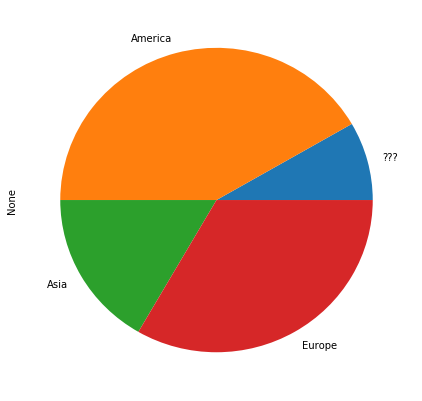

In [246]:
ignite_pie = ignite_df.groupby("original_continent").size()
ignite_pie.plot.pie(figsize=(7,7))

And then you can have fun with the parameters :

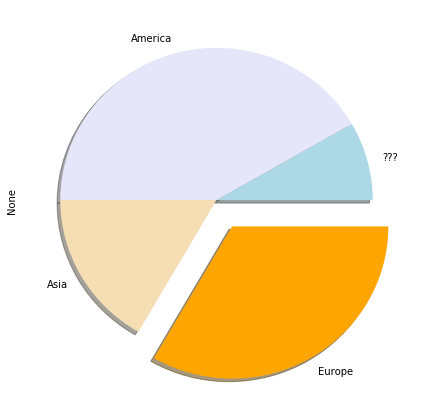

In [245]:
ignite_pie.plot.pie(figsize=(7,7), explode=[0,0,0,0.2], colors=["lightblue", "lavender", "wheat", "orange"], shadow=True)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa6c2a828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa6a76fd0>]], dtype=object)

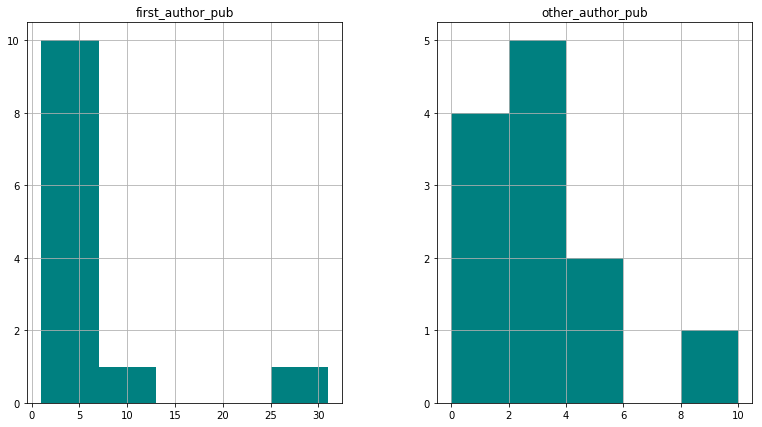

In [259]:
ignite_df.hist(bins=5, color="teal", figsize=(13,7))